In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
import zipfile
local_zip = '/content/drive/My Drive/Contest/dataset-2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#To output images in a 6x4 configuration
nrows = 6
ncols = 4

pic_index = 0 

In [7]:
base_dir = '/tmp/dataset-2'

train_dir = '/tmp/dataset-2/train_set'
validation_dir = '/tmp/dataset-2/test_set'

# Directory with training cat/dog pictures
train_cats_dir = '/tmp/dataset-2/train_set/cats'
train_bananas_dir = '/tmp/dataset-2/train_set/bananas'
train_palms_dir = '/tmp/dataset-2/train_set/palms'

# Directory with validation cat/dog pictures
validation_cats_dir = '/tmp/dataset-2/test_set/cats'
validation_bananas_dir = '/tmp/dataset-2/test_set/bananas'
validation_palms_dir = '/tmp/dataset-2/test_set/palms'


In [8]:
train_cat_fnames = os.listdir( train_cats_dir )
train_banana_fnames = os.listdir( train_bananas_dir )
train_palm_fnames = os.listdir( train_palms_dir )

print(train_cat_fnames[:10])
print(train_banana_fnames[:10])
print(train_palm_fnames[:10])

['cat.28.jpg', 'cat.103.jpg', 'cat.178.jpg', 'cat.20.jpg', 'cat.95.jpg', 'cat.186.jpg', 'cat.63.jpg', 'cat.31.jpg', 'cat.4014.jpg', 'cat.197.jpg']
['datasets_50721_94741_original_data_set_freshbanana_Screen Shot 2018-06-12 at 9.48.26 PM.png', 'banana24.png', 'banana9.png', 'banana19.png', 'banana38.png', 'banana25.png', 'banana13.png', 'banana39.png', 'banana41.png', 'banana4.png']
['palm01.jpg', 'cjbnajspalm.jpg', 'hand-663725_960_720.jpg', 'hand-1635143__340.jpg', 'open-palm-female-hand-left-human-palm-png-clipart.jpg', '1800ss_getty_rf_cancer_on_hand.jpg', '3rruhnde.jpg', 'icqne298chpalm.jpg', 'maxresdefault.jpg', 'palmistry-picture-id1137107858.jpg']


In [9]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training banana images :', len(os.listdir(train_bananas_dir)))
print('Total training palm images :', len(os.listdir(train_palms_dir)))
tot = len(os.listdir(train_cats_dir))+len(os.listdir(train_bananas_dir))+len(os.listdir(train_palms_dir))
print('Total No. of training examples :', tot)
print()
print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation banana images :', len(os.listdir(validation_bananas_dir)))
print('Total validation palm images :', len(os.listdir(validation_palms_dir)))
tot = len(os.listdir(validation_cats_dir))+len(os.listdir(validation_bananas_dir))+len(os.listdir(validation_palms_dir))
print('Total No. of validation examples :',tot)

Total training cat images : 54
Total training banana images : 48
Total training palm images : 48
Total No. of training examples : 150

Total validation cat images : 86
Total validation banana images : 87
Total validation palm images : 87
Total No. of validation examples : 260


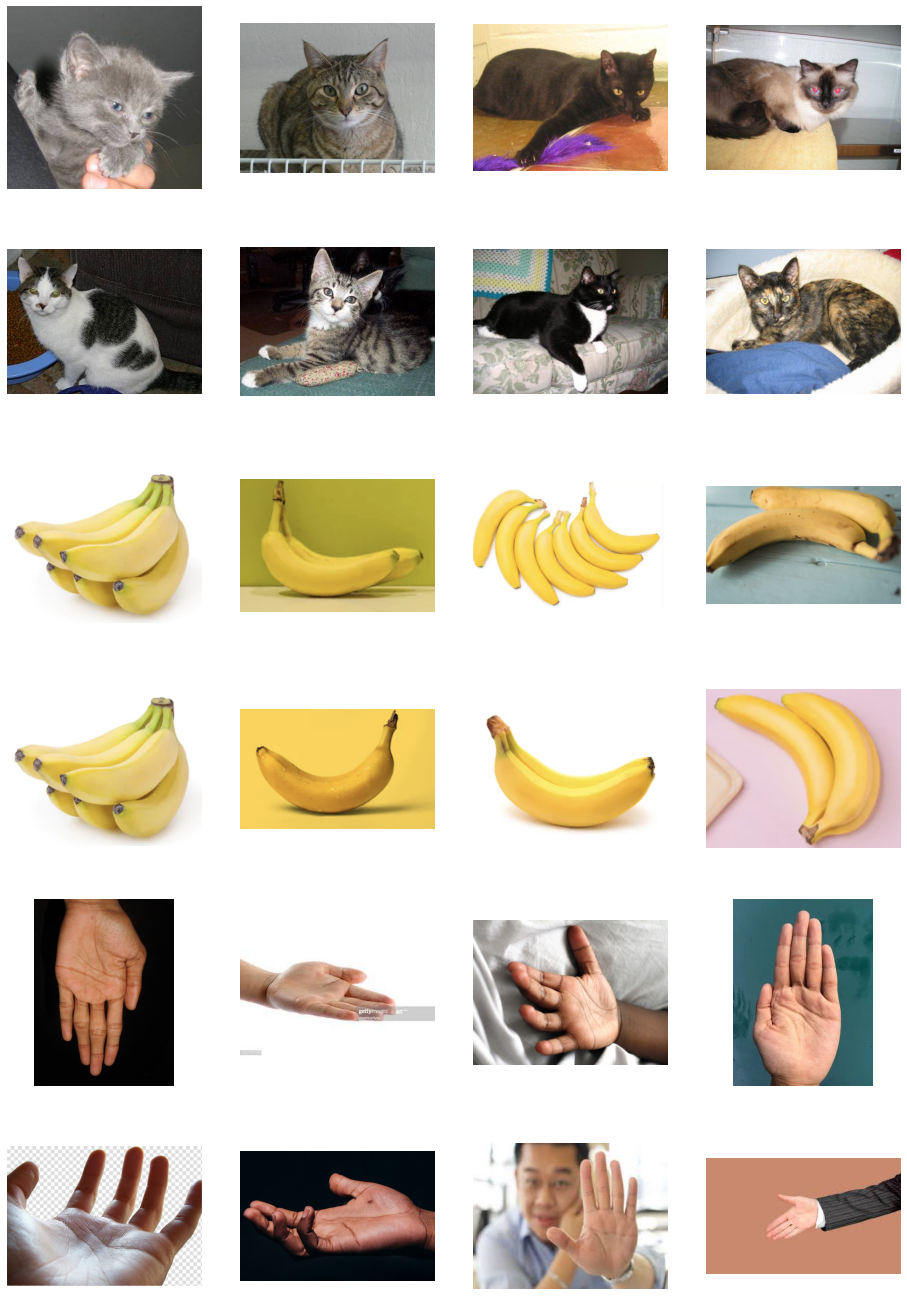

In [10]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_banana_pix = [os.path.join(train_bananas_dir, fname) 
                for fname in train_banana_fnames[ pic_index-8:pic_index]
               ]

next_palm_pix = [os.path.join(train_palms_dir, fname) 
                for fname in train_palm_fnames[ pic_index-8:pic_index]
               ]             

for i, img_path in enumerate(next_cat_pix+next_banana_pix+next_palm_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

#Freeze the model
for layer in pre_trained_model.layers:
  layer.trainable = False
print(len(pre_trained_model.layers))  
pre_trained_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
19
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
___________________________________________________________

In [13]:
#Getting outputs of block5_pool layer to feed to Dense layer
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 512)


In [14]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.33)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size = 1,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

Found 150 images belonging to 3 classes.
Found 260 images belonging to 3 classes.


In [16]:
model_history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            epochs = 30,
            verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
15/15 - 7s - loss: 1.5935 - accuracy: 0.6600 - val_loss: 0.3010 - val_accuracy: 0.9038
Epoch 2/30
15/15 - 6s - loss: 0.6074 - accuracy: 0.8133 - val_loss: 0.1765 - val_accuracy: 0.9500
Epoch 3/30
15/15 - 6s - loss: 0.2490 - accuracy: 0.9200 - val_loss: 0.1319 - val_accuracy: 0.9462
Epoch 4/30
15/15 - 6s - loss: 0.2569 - accuracy: 0.9133 - val_loss: 0.0928 - val_accuracy: 0.9692
Epoch 5/30
15/15 - 6s - loss: 0.1153 - accuracy: 0.9467 - val_loss: 0.0749 - val_accuracy: 0.9808
Epoch 6/30
15/15 - 6s - loss: 0.1197 - accuracy: 0.9533 - val_loss: 0.0704 - val_accuracy: 0.9731
Epoch 7/30
15/15 - 6s - loss: 0.1219 - accuracy: 0.9533 - val_loss: 1.4110 - val_accuracy: 0.6962
Epoch 8/30
15/15 - 6s - loss: 0.4091 - accuracy: 0.9067 - val_loss: 0.1219 - val_accuracy: 0.9692
Epoch 9/30
15/15 - 6s - loss: 0.2272 - accuracy: 0.9333 - val_loss: 0.1132 - val_accuracy: 0.9692
Epoch 10/30
15/15 - 6s - loss: 0.2112 - ac

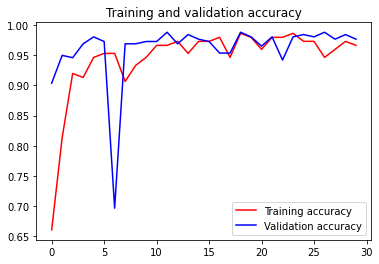

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving d_mach_cats_1904170.focal-760x428.jpg to d_mach_cats_1904170.focal-760x428.jpg
probability of image being a Banana: 0.0
probability of image being a Cat: 1.0
probability of image being a Human Palm: 0.0


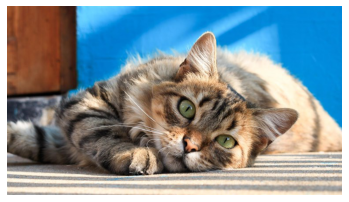

In [23]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  fig = plt.gcf()
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('Off')
  classes = model.predict(images, batch_size=10)
  
  print("probability of image being a Banana:",classes[0][0])
  print("probability of image being a Cat:", classes[0][1])
  print("probability of image being a Human Palm:",classes[0][2])

plt.show()